In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(800, 2))
anomalies = np.random.normal(loc=8, scale=2, size=(20, 2))
data = np.vstack([normal_data, anomalies])

In [3]:
# Fit a Gaussian Mixture Model (GMM)
n_components = 2  # You may need to adjust this based on your data
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(data)

C:\Users\91755\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


GaussianMixture(n_components=2, random_state=42)

In [4]:
# Predict the labels (clusters) for each data point
labels = gmm.predict(data)

In [5]:
# Compute the probability of each sample being an outlier
probs = gmm.score_samples(data)
threshold = np.percentile(probs, 5)  # Adjust the percentile based on your tolerance for false positives

In [6]:
# Identify anomalies based on the threshold
anomaly_mask = (probs < threshold)

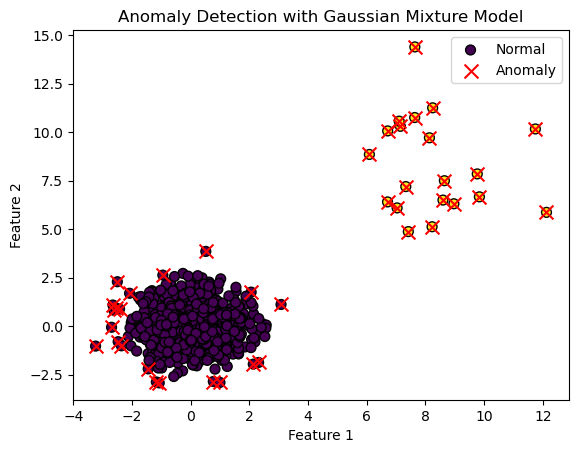

In [7]:
# Plot the data points and anomalies
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k', s=50, label='Normal')
plt.scatter(data[anomaly_mask, 0], data[anomaly_mask, 1], color='red', marker='x', s=100, label='Anomaly')
plt.title('Anomaly Detection with Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()